In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
figdir="/data/Phillippy/projects/HG002_Masseq/figure"

In [3]:
isoquant = "/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2312_3/chm13.hg002_read/OUT/OUT.transcript_model_tpm.tsv"

In [4]:
sqanti = "/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2312_3/model/chm13.hg002_read_squanti3_rescued_classification.txt"

In [5]:
df1 = pd.read_csv(isoquant, header = 0, sep= '\t')

df1.columns = ['isoform','TPM']
df1.head()

,isoform,TPM
0,TCONS_00000002,2.296057
1,TCONS_00000025,0.255781
2,TCONS_00000041,8.082119
3,TCONS_00000043,28.815509
4,TCONS_00000049,2.847110


In [7]:
df2 = pd.read_csv(sqanti, sep = '\t' , header =None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,TCONS_00000002,chr1,+,6074,2,full-splice_match,NaN,TCONS_00000002,6074.0,2.0,...,CAAAGCCTGTTGGTGGACTC,-102.0,True,54.0,True,NaN,NaN,False,MPKGWGVRSSTFLPLWLPVKIELHQVQFHSSSQMIFSTLRSELYKL...,NaN
1,TCONS_00000025,chr1,+,2563,12,full-splice_match,NaN,TCONS_00000025,2563.0,12.0,...,GGCTGAGCATCTCTCTCTGG,0.0,True,51.0,True,AATAAA,-21.0,True,MQPRSERPAGRTQSPEHGSPGPGPEAPPPPPPQPPAPEAERTRPRQ...,NaN
2,TCONS_00000041,chr1,+,637,2,full-splice_match,NaN,TCONS_00000041,637.0,2.0,...,TGGCTGCCTCTGTGTCTGTG,-10.0,True,156.0,True,AATAAA,-19.0,True,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,NaN
3,TCONS_00000043,chr1,+,7326,36,full-splice_match,NaN,TCONS_00000043,7326.0,36.0,...,GCATTGCTTTTGTCCATCCT,-2.0,True,51.0,True,AATAAA,-18.0,True,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,NaN
4,TCONS_00000049,chr1,+,6473,31,full-splice_match,NaN,TCONS_00000049,6473.0,31.0,...,GCATTGCTTTTGTCCATCCT,7253.0,False,51.0,True,AATAAA,-18.0,True,MLHVHACTHQISLHVASAGPCETCGDAVCAFGAVCSAGQCVCPRCE...,NaN


In [11]:
df1=df1[df1['isoform'].isin(df2[0])]

/tmp/ipykernel_1923749/303222490.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10)


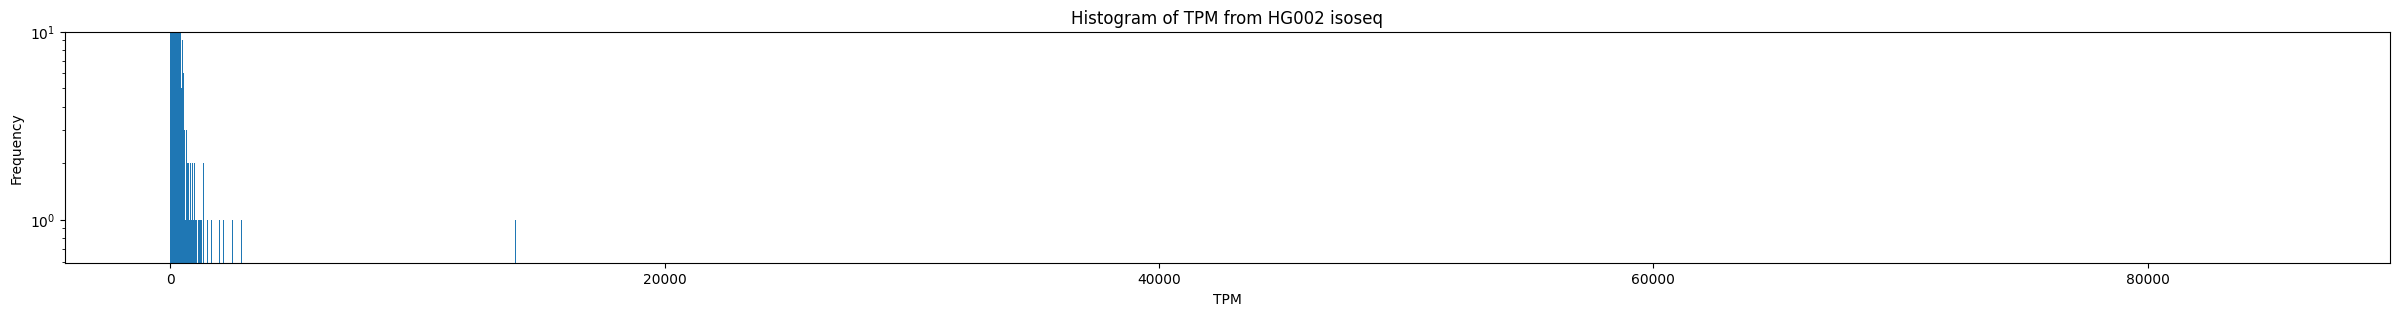

In [12]:
fig = plt.figure(figsize=(30, 3))
plt.hist(df1.TPM, bins=10000,log=True)

# Adding x-axis and y-axis labels
plt.xlabel('TPM', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of TPM from HG002 isoseq', fontsize=12)
plt.ylim(0,10)
plt.savefig(figdir + '/hist.exp_isoquant.png', bbox_inches='tight',dpi=300,transparent=True)

plt.show() 

In [16]:
df2 = df2[[0,5]]
df2.columns = ['isoform','structure']

In [18]:
df = pd.merge(df1,df2,on='isoform')

In [27]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with a 'TPM' column
df['log_TPM'] = np.log(df['TPM'])

In [37]:
df

,isoform,TPM,structure,log2_TPM,log_TPM
0,TCONS_00000002,2.296057,full-splice_match,1.199158,0.831193
1,TCONS_00000025,0.255781,full-splice_match,-1.967019,-1.363434
2,TCONS_00000041,8.082119,full-splice_match,3.014734,2.089654
3,TCONS_00000043,28.815509,full-splice_match,4.848774,3.360914
4,TCONS_00000049,2.847110,full-splice_match,1.509498,1.046304
...,...,...,...,...,...
45403,transcript707.chrY.nnic,0.206645,novel_not_in_catalog,-2.274774,-1.576753
45404,transcript732.chrY.nnic,0.275527,genic,-1.859734,-1.289070
45405,transcript81.chrY.nnic,0.413290,novel_not_in_catalog,-1.274774,-0.883606
45406,transcript90.chrY.nic,9.918964,incomplete-splice_match,3.310189,2.294448


In [38]:
tab

,cat,count
0,antisense,207
1,full-splice_match,31278
2,genic,85
3,incomplete-splice_match,2709
4,intergenic,165
5,novel_in_catalog,4581
6,novel_not_in_catalog,6383


In [40]:
tab = pd.DataFrame(df.groupby(['structure']).size()).reset_index()
tab.columns = ['cat','count']
tab['col'] = ['#787A7B','#67A6D3','#515151','#E38E67','#6D4A97','#7AB581','#D8715B']
tab

,cat,count,col
0,antisense,207,#787A7B
1,full-splice_match,31278,#67A6D3
2,genic,85,#515151
3,incomplete-splice_match,2709,#E38E67
4,intergenic,165,#6D4A97
5,novel_in_catalog,4581,#7AB581
6,novel_not_in_catalog,6383,#D8715B


In [58]:
tab.index = tab['cat']

,cat,count,col
cat,,,
full-splice_match,full-splice_match,31278,#67A6D3
novel_in_catalog,novel_in_catalog,4581,#7AB581
incomplete-splice_match,incomplete-splice_match,2709,#E38E67
novel_not_in_catalog,novel_not_in_catalog,6383,#D8715B
intergenic,intergenic,165,#6D4A97
antisense,antisense,207,#787A7B
genic,genic,85,#515151


0        #67A6D3
1        #67A6D3
2        #67A6D3
3        #67A6D3
4        #67A6D3
          ...   
44874    #515151
44875    #515151
44876    #515151
45311    #515151
45404    #515151
Name: col, Length: 45408, dtype: object

In [66]:
tab.loc[df['structure'].unique().tolist(),]['col']

cat
full-splice_match          #67A6D3
novel_in_catalog           #7AB581
incomplete-splice_match    #E38E67
novel_not_in_catalog       #D8715B
intergenic                 #6D4A97
antisense                  #787A7B
genic                      #515151
Name: col, dtype: object

In [73]:
pd.merge(df,tab,left_on="structure", right_index=True, how = 'left')

,isoform,TPM,structure,log2_TPM,log_TPM,cat,count,col
0,TCONS_00000002,2.296057,full-splice_match,1.199158,0.831193,full-splice_match,31278,#67A6D3
1,TCONS_00000025,0.255781,full-splice_match,-1.967019,-1.363434,full-splice_match,31278,#67A6D3
2,TCONS_00000041,8.082119,full-splice_match,3.014734,2.089654,full-splice_match,31278,#67A6D3
3,TCONS_00000043,28.815509,full-splice_match,4.848774,3.360914,full-splice_match,31278,#67A6D3
4,TCONS_00000049,2.847110,full-splice_match,1.509498,1.046304,full-splice_match,31278,#67A6D3
...,...,...,...,...,...,...,...,...
45403,transcript707.chrY.nnic,0.206645,novel_not_in_catalog,-2.274774,-1.576753,novel_not_in_catalog,6383,#D8715B
45404,transcript732.chrY.nnic,0.275527,genic,-1.859734,-1.289070,genic,85,#515151
45405,transcript81.chrY.nnic,0.413290,novel_not_in_catalog,-1.274774,-0.883606,novel_not_in_catalog,6383,#D8715B
45406,transcript90.chrY.nic,9.918964,incomplete-splice_match,3.310189,2.294448,incomplete-splice_match,2709,#E38E67


In [74]:
df

,isoform,TPM,structure,log2_TPM,log_TPM
0,TCONS_00000002,2.296057,full-splice_match,1.199158,0.831193
1,TCONS_00000025,0.255781,full-splice_match,-1.967019,-1.363434
2,TCONS_00000041,8.082119,full-splice_match,3.014734,2.089654
3,TCONS_00000043,28.815509,full-splice_match,4.848774,3.360914
4,TCONS_00000049,2.847110,full-splice_match,1.509498,1.046304
...,...,...,...,...,...
45403,transcript707.chrY.nnic,0.206645,novel_not_in_catalog,-2.274774,-1.576753
45404,transcript732.chrY.nnic,0.275527,genic,-1.859734,-1.289070
45405,transcript81.chrY.nnic,0.413290,novel_not_in_catalog,-1.274774,-0.883606
45406,transcript90.chrY.nic,9.918964,incomplete-splice_match,3.310189,2.294448


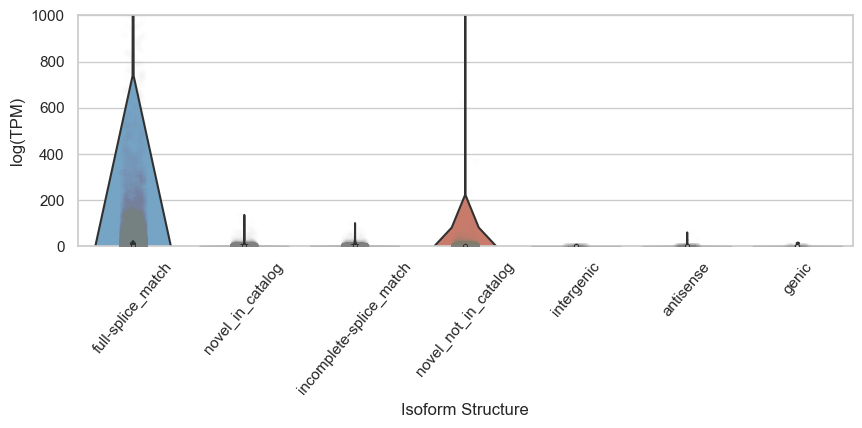

In [102]:
import seaborn
plt.figure(figsize=(10, 3))
seaborn.set(style = 'whitegrid') 
    
seaborn.violinplot(x ="structure", 
             y ="TPM", 
             data = df,
                  palette=tab.loc[df['structure'].unique().tolist(),]['col'],
                  scale='width')
seaborn.stripplot(x="structure", 
              y="TPM", 
              data=df,
              jitter=True,
              alpha=0.01,
              color='grey',
                 linewidth=0.1)  # Use a single color for all points

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=50)
plt.ylim(0,1000)
# Set axis labels
plt.xlabel('Isoform Structure', fontsize=12)
plt.ylabel('log(TPM)', fontsize=12)

# Save the plot to a file
plt.savefig(figdir + '/violin_plot.exp_tpm_by_structure.png', dpi=300, bbox_inches='tight',
           transparent=True)  # Save as PNG format with higher resolution

plt.show()

In [31]:
df = pd.merge(df1,df2,on= 'isoform')

In [35]:
df.head()

,isoform,TPM,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,...,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
0,TCONS_00000002,2.338179,chr1,+,6074,2,full-splice_match,NaN,TCONS_00000002,6074.0,...,CAAAGCCTGTTGGTGGACTC,-102.0,True,54.0,True,NaN,NaN,False,MPKGWGVRSSTFLPLWLPVKIELHQVQFHSSSQMIFSTLRSELYKL...,NaN
1,TCONS_00000025,0.260473,chr1,+,2563,12,full-splice_match,NaN,TCONS_00000025,2563.0,...,GGCTGAGCATCTCTCTCTGG,0.0,True,51.0,True,AATAAA,-21.0,True,MQPRSERPAGRTQSPEHGSPGPGPEAPPPPPPQPPAPEAERTRPRQ...,NaN
2,TCONS_00000041,8.230391,chr1,+,637,2,full-splice_match,NaN,TCONS_00000041,637.0,...,TGGCTGCCTCTGTGTCTGTG,-10.0,True,156.0,True,AATAAA,-19.0,True,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,NaN
3,TCONS_00000043,29.344149,chr1,+,7326,36,full-splice_match,NaN,TCONS_00000043,7326.0,...,GCATTGCTTTTGTCCATCCT,-2.0,True,51.0,True,AATAAA,-18.0,True,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,NaN
4,TCONS_00000049,2.899342,chr1,+,6473,31,full-splice_match,NaN,TCONS_00000049,6473.0,...,GCATTGCTTTTGTCCATCCT,7253.0,False,51.0,True,AATAAA,-18.0,True,MLHVHACTHQISLHVASAGPCETCGDAVCAFGAVCSAGQCVCPRCE...,NaN


In [37]:
filtered_df = df[df['chrom'].isin(['chr{}'.format(i) for i in range(1, 22)])]
filtered_df

,isoform,TPM,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,...,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
0,TCONS_00000002,2.338179,chr1,+,6074,2,full-splice_match,NaN,TCONS_00000002,6074.0,...,CAAAGCCTGTTGGTGGACTC,-102.0,True,54.0,True,NaN,NaN,False,MPKGWGVRSSTFLPLWLPVKIELHQVQFHSSSQMIFSTLRSELYKL...,NaN
1,TCONS_00000025,0.260473,chr1,+,2563,12,full-splice_match,NaN,TCONS_00000025,2563.0,...,GGCTGAGCATCTCTCTCTGG,0.0,True,51.0,True,AATAAA,-21.0,True,MQPRSERPAGRTQSPEHGSPGPGPEAPPPPPPQPPAPEAERTRPRQ...,NaN
2,TCONS_00000041,8.230391,chr1,+,637,2,full-splice_match,NaN,TCONS_00000041,637.0,...,TGGCTGCCTCTGTGTCTGTG,-10.0,True,156.0,True,AATAAA,-19.0,True,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,NaN
3,TCONS_00000043,29.344149,chr1,+,7326,36,full-splice_match,NaN,TCONS_00000043,7326.0,...,GCATTGCTTTTGTCCATCCT,-2.0,True,51.0,True,AATAAA,-18.0,True,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,NaN
4,TCONS_00000049,2.899342,chr1,+,6473,31,full-splice_match,NaN,TCONS_00000049,6473.0,...,GCATTGCTTTTGTCCATCCT,7253.0,False,51.0,True,AATAAA,-18.0,True,MLHVHACTHQISLHVASAGPCETCGDAVCAFGAVCSAGQCVCPRCE...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47165,transcript8345.chr21.nic,10.460079,chr21,+,3720,10,novel_in_catalog,NaN,novel,2245.0,...,TAGACAGTGTGGTTGTGGTT,-29.0,True,65.0,True,NaN,NaN,False,MATSGDCPRSESQGEEPAECSEAGLLQEGVQPEEFVAIADYAATDE...,NaN
47166,transcript8365.chr21.nic,5.798684,chr21,+,3505,8,incomplete-splice_match,NaN,TCONS_00225356,2354.0,...,ATTTGCATTACAGTTTTTTT,-27.0,True,58.0,True,NaN,NaN,False,MATSGDCPRSESQGEEPAECSEAGLLQEGVQPEEFVAIADYAATDE...,NaN
47167,transcript847.chr21.nnic,1.075562,chr21,-,2908,3,novel_not_in_catalog,NaN,novel,4485.0,...,AACAAAAATTTTCTGGGAAG,NaN,False,NaN,False,NaN,NaN,False,NaN,NaN
47168,transcript854.chr21.nnic,2.384943,chr21,+,2475,3,novel_not_in_catalog,NaN,novel,1500.0,...,TCCCCCGACCCACCACCCCA,64.0,False,NaN,False,AATAAA,-21.0,True,NaN,NaN


In [38]:
filtered_df['structural_category'].unique()

array(['full-splice_match', 'novel_in_catalog', 'incomplete-splice_match',
       'novel_not_in_catalog', 'intergenic', 'antisense', 'genic'],
      dtype=object)